In [1]:
import os, datetime, time, sys
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


### SHAPE of data set

In [4]:
df.shape

(8807, 12)

### Data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Convert date added and realse year into date format

### Check for null values

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Null values in: 

    > director        
    > cast 
    > country
    > date_added
    > rating 
    > listed_in

### Understand null values if they can be treated or deleted or mainatained as is..

1. Null values in --> duration

In [7]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [8]:
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


> Rating and duration are mismacthed and title contains director's name. This data can be deleted.

2. Null values in --> rating

In [9]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


> Even director's name is null, so delete these reocrds.

3. Null values in --> date_added

In [10]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Director's name is also null and can't impute it --> so delete 

### FINAL UNDERSTANDING ON NULL VALUES

> 1.  NULL VALUES IN DURATION, RATING AND DATE_ADDED WILL BE DELETED AND

In [11]:
df = df.dropna(subset=['duration', 'rating','date_added'])
df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

### FINAL UNDERSTANDING 

>2. NULL VALUES IN DIRECTOR, COUNTRY AND CAST WILL BE REPLACED BY UNKNOWN

In [12]:
def null_to_unknow(Dataframe, col):
    df.loc[df[col].isnull(),col] = 'Unknown'
    print(df.loc[df[col].isnull(),col])

In [13]:
null_to_unknow(df, 'director')

null_to_unknow(df, 'cast')

null_to_unknow(df, 'country')


df.isnull().sum()

Series([], Name: director, dtype: object)
Series([], Name: cast, dtype: object)
Series([], Name: country, dtype: object)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Try to understand unique data present is each column

In [14]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [15]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

> More movies than TV shows

In [16]:
df['title'].value_counts()

Dick Johnson Is Dead                1
Cooked                              1
My Beautiful Broken Brain           1
Pee-wee's Big Holiday               1
Netflix Presents: The Characters    1
                                   ..
Sleepless Society: Insomnia         1
Palazuelos mi rey                   1
Narcos: Mexico                      1
Love Is Blind                       1
Zubaan                              1
Name: title, Length: 8790, dtype: int64

> No duplicates in tittle

In [17]:
df['director'].value_counts()

Unknown                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

 > Highest in director column is unknown.
 
 > Some movies are directed by more than 1 director

In [18]:
df['cast'].value_counts()

Unknown                                                                                                                                          825
David Attenborough                                                                                                                                19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                           14
Samuel West                                                                                                                                       10
Jeff Dunham                                                                                                                                        7
                                                                                                                                                ... 
Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, Suhasi

 > Movies have cast more than 1, so need to work on this to get understing for cast wise movie release.

In [19]:
df['country'].value_counts()

United States                             2809
India                                      972
Unknown                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

> More movies from US follwed by India

In [20]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [21]:
df['listed_in'].value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

> listed_in have multiple genre, -> need to split and work on this part as well like cast and director

In [22]:
df['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [23]:
df['duration'].value_counts()

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

## Get column added year/month/day from the date added field

In [24]:
df.reset_index(inplace = True, drop = True)
df['added_year'] = ''
for i in range(len(df)):
    df.loc[i,'added_year'] = df.loc[i,'date_added'][-4:]

In [25]:
df['date_added'].str.split()

0       [September, 25,, 2021]
1       [September, 24,, 2021]
2       [September, 24,, 2021]
3       [September, 24,, 2021]
4       [September, 24,, 2021]
                 ...          
8785     [November, 20,, 2019]
8786          [July, 1,, 2019]
8787      [November, 1,, 2019]
8788      [January, 11,, 2020]
8789         [March, 2,, 2019]
Name: date_added, Length: 8790, dtype: object

In [26]:
df.reset_index(inplace = True, drop = True)
df['added_month'] = ''
for i in range(len(df)):
    df.loc[i,'added_month'] = df.loc[i,'date_added'].split()[0]

In [27]:
df.reset_index(inplace = True, drop = True)
df['added_day'] = ''
for i in range(len(df)):
    df.loc[i,'added_day'] = df.loc[i,'date_added'].split()[1]
    df.loc[i,'added_day'] =  df.loc[i,'added_day'][:-1] # remove extra ,
    

In [87]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24,0


In [88]:
df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
8788,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,11,14
8789,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,2,4


In [30]:
df['added_year'].value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: added_year, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
 12  added_year    8790 non-null   object
 13  added_month   8790 non-null   object
 14  added_day     8790 non-null   object
dtypes: int64(1), object(14)
memory usage: 1.0+ MB


In [32]:
df['added_year'] = df['added_year'].astype(int)

df['gap_ad_rls'] = df['added_year'] - df['release_year']

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,24,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,24,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,24,0


In [33]:
df['gap_ad_rls'].unique()

array([ 1,  0, 28,  3, 25, 23, 24, 11,  8,  4, 46, 43, 38, 34,  9, 20,  7,
       19, 18, 17, 10, 13, 12, 14, 16, 15, 27,  6,  2,  5, 39, 32, 31, 30,
       22, 35, 29, 37, 41, 60, 21, 26, 36, 45, 62, 33, 40, 49, 57, 76, -1,
       66, 64, 50, 47, 44, 93, 51, 55, 48, 42, -2, 54, 59, 61, 52, 63, -3,
       72, 71, 75, 65, 73, 70, 74], dtype=int64)

> gap between add year and releas year always should be >= 0.

> if any negative value means, added before release ?? Not possible

In [34]:
df[df['gap_ad_rls'] < 0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
1551,s1552,TV Show,Hilda,Unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States","December 14, 2020",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020,December,14,-1
1696,s1697,TV Show,Polly Pocket,Unknown,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland","November 15, 2020",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...,2020,November,15,-1
2920,s2921,TV Show,Love Is Blind,Unknown,"Nick Lachey, Vanessa Lachey",United States,"February 13, 2020",2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...,2020,February,13,-1
3168,s3169,TV Show,Fuller House,Unknown,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United States,"December 6, 2019",2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,2019,December,6,-1
3287,s3288,TV Show,Maradona in Mexico,Unknown,Diego Armando Maradona,"Argentina, United States, Mexico","November 13, 2019",2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",2019,November,13,-1
3369,s3370,TV Show,BoJack Horseman,Unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,"October 25, 2019",2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,2019,October,25,-1
3433,s3434,TV Show,The Hook Up Plan,Unknown,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,"October 11, 2019",2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",2019,October,11,-1
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,Unknown,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United States,"May 30, 2018",2019,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...,2018,May,30,-1
4845,s4846,TV Show,Arrested Development,Unknown,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United States,"May 29, 2018",2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,2018,May,29,-1
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,"July 1, 2017",2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,2017,July,1,-1


In [35]:
df[df['gap_ad_rls'] < 0].shape

(14, 16)

> These are the reocrds with flase info in realese year

> So replacing add year = releasee year

In [36]:
for i in range(len(df)):
    if df.loc[i,'gap_ad_rls'] < 0:
        df.loc[i,'added_year'] = df.loc[i,'release_year']
    else:
        continue

# recalculate the gap
df['gap_ad_rls'] = df['added_year'] - df['release_year']

In [37]:
df['gap_ad_rls'].unique()

array([ 1,  0, 28,  3, 25, 23, 24, 11,  8,  4, 46, 43, 38, 34,  9, 20,  7,
       19, 18, 17, 10, 13, 12, 14, 16, 15, 27,  6,  2,  5, 39, 32, 31, 30,
       22, 35, 29, 37, 41, 60, 21, 26, 36, 45, 62, 33, 40, 49, 57, 76, 66,
       64, 50, 47, 44, 93, 51, 55, 48, 42, 54, 59, 61, 52, 63, 72, 71, 75,
       65, 73, 70, 74], dtype=int64)

#  

# Visual Analysis - Univariate, Bivariate after pre-processing of the data

Hints

The exploration should have a goal. 
As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.

Start by exploring a few questions: 
    
> 1. What type of content is available in different countries?

> 2. How has the number of movies released per year changed over the last 20-30 years?

> 3. Comparison of tv shows vs. movies.

> 4. What is the best time to launch a TV show?

> 5. Analysis of actors/directors of different types of shows/movies.

> 6. Does Netflix has more focus on TV Shows than movies in recent years

> 7. Understanding what content is available in different countries

Evaluation Criteria (100 Points):

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

    4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

    4.2 For categorical variable(s): Boxplot (10 Points)

    4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

    6.1 Comments on the range of attributes

    6.2 Comments on the distribution of the variables and relationship between them

    6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

Submission Process:

Type your insights and recommendations in the rich-text editor.

Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.

Alternatively, you can directly submit your PDF on the portal.

Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).

After submitting, you will not be allowed to edit your submission.


Trend of 
> How has the number of movies released per year changed over the last 20-30 years?

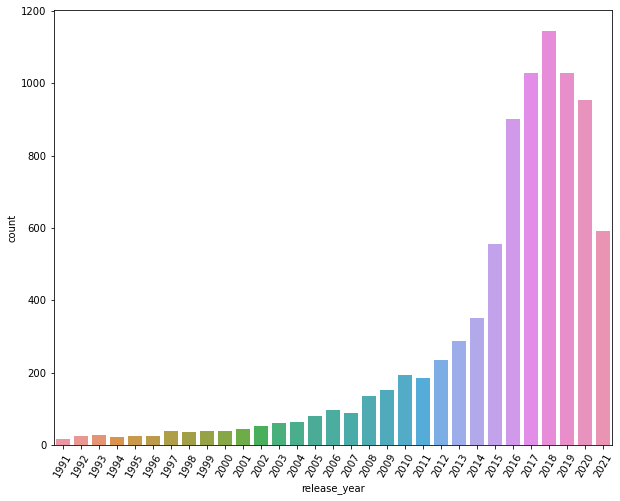

In [38]:
df_graph = df[df['release_year'] > 1990]
plt.figure(figsize=(10,8))
g = sns.countplot(x="release_year", data=df_graph)
g.tick_params(axis='x', rotation=60)

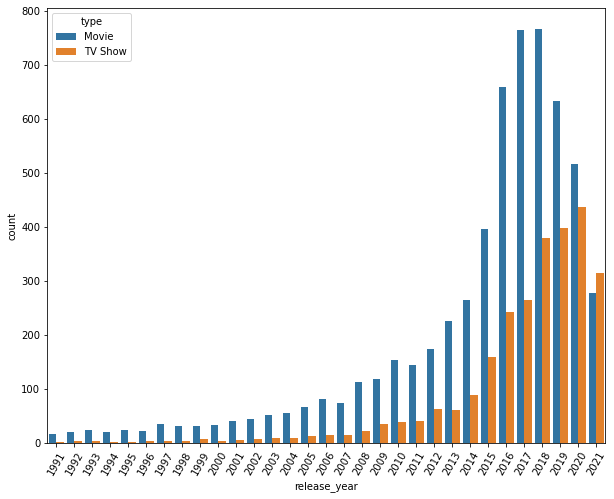

In [39]:
df_graph = df[df['release_year'] > 1990]
plt.figure(figsize=(10,8))
g = sns.countplot(x="release_year", data=df_graph, hue = 'type')
g.tick_params(axis='x', rotation=60)

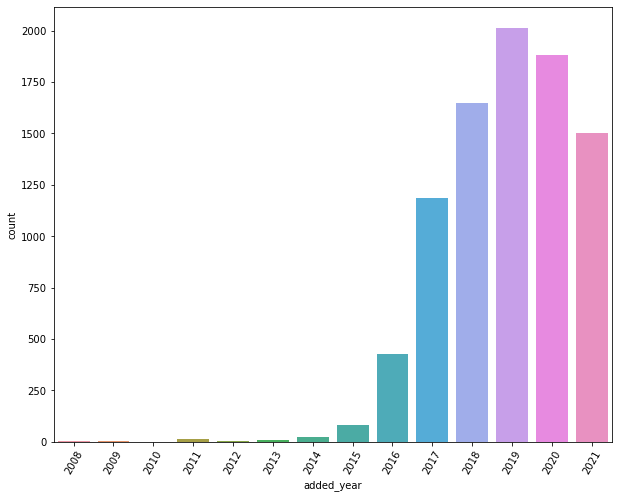

In [40]:
df_graph = df[df['added_year'] > 1990]
plt.figure(figsize=(10,8))
g = sns.countplot(x="added_year", data=df_graph)
g.tick_params(axis='x', rotation=60)

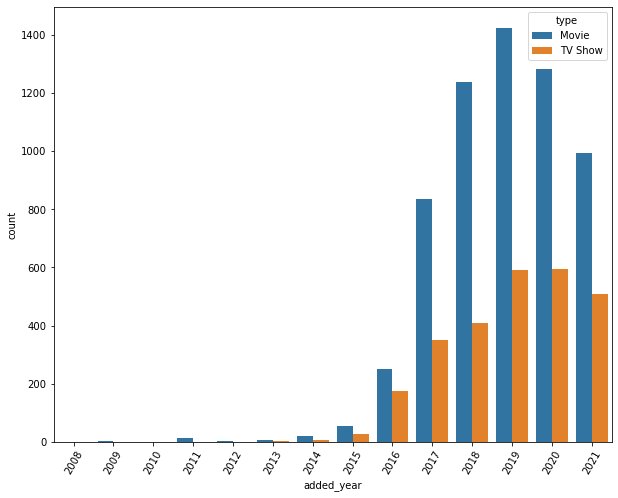

In [41]:
df_graph = df[df['added_year'] > 1990]
plt.figure(figsize=(10,8))
g = sns.countplot(x="added_year", data=df_graph, hue = 'type')
g.tick_params(axis='x', rotation=60)

# Describe- over all, TV show and movies

In [42]:
df.describe()

,release_year,added_year,gap_ad_rls
count,8790.000000,8790.000000,8790.000000
mean,2014.183163,2018.875540,4.692378
std,8.825466,1.572528,8.788835
min,1925.000000,2008.000000,0.000000
25%,2013.000000,2018.000000,0.000000
50%,2017.000000,2019.000000,1.000000
75%,2019.000000,2020.000000,5.000000
max,2021.000000,2021.000000,93.000000


In [43]:
# avarage gap added between TV shows and Movies
df[df['type'] == 'Movie'].describe()

,release_year,added_year,gap_ad_rls
count,6126.000000,6126.000000,6126.000000
mean,2013.120144,2018.851453,5.731309
std,9.681723,1.560995,9.745544
min,1942.000000,2008.000000,0.000000
25%,2012.000000,2018.000000,0.000000
50%,2016.000000,2019.000000,2.000000
75%,2018.000000,2020.000000,7.000000
max,2021.000000,2021.000000,75.000000


In [44]:
df[df['type'] == 'TV Show'].describe()

,release_year,added_year,gap_ad_rls
count,2664.000000,2664.000000,2664.000000
mean,2016.627628,2018.930931,2.303303
std,5.735194,1.597653,5.319352
min,1925.000000,2008.000000,0.000000
25%,2016.000000,2018.000000,0.000000
50%,2018.000000,2019.000000,0.000000
75%,2020.000000,2020.000000,2.000000
max,2021.000000,2021.000000,93.000000


From above graphs and decribe we can understand that 

**Overall per year production is increasing over the years.

**Movies are realsed more in every year compare to TV shows.

**and same case with netflix- added more movies than the TV shows.

> another intresting fact, based on mean gap between date added and date realsed shows.

    1. overall mean gap is -> 4.692378 years
    2. For movies mean gap gap is -> 5.731309
    3. for TV shows mean gap is -> 5.319352
    But movies has outlier, older movies are added recently.
    
> so use median of gap between date added and date realsed shows.

    1. overall mean gap is -> 1 years
    2. For movies mean gap gap is -> 2
    3. for TV shows mean gap is -> 0
    
**what we can understand from this is, more TV shows are released on netflix directly than movies.

In [45]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24,0


# 

# Unnest data for better understanding  
where there are multiple values present for each id

# 1. Unnest cast data to Actors column

In [46]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24,0


In [89]:
constraint_cast = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
#constraint_cast

In [48]:
df_new = pd.DataFrame(constraint_cast, index = df['show_id'])
df_new = df_new.stack()
df_new = pd.DataFrame(df_new.reset_index())
df_new.drop('level_1', axis = 1, inplace = True)
df_new.rename(columns = {0: 'Actors'}, inplace = True)
df_new

,show_id,Actors
0,s1,Unknown
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
...,...,...
64836,s8807,Manish Chaudhary
64837,s8807,Meghna Malik
64838,s8807,Malkeet Rauni
64839,s8807,Anita Shabdish


In [49]:
df_fnl_temp_1 = df_new.merge(df[['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_month', 'added_day', 'gap_ad_rls']], on = 'show_id', how = 'left')
print(df_fnl_temp_1.shape)
df_fnl_temp_1.head(2)

(64841, 16)


,show_id,Actors,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
0,s1,Unknown,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,Ama Qamata,TV Show,Blood & Water,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24,0


# 2. Unnest director data to Directors (new column)

In [90]:
constraint_director = df['director'].apply(lambda x: str(x).split(', ')).to_list()
#constraint_director

In [51]:
df_new = pd.DataFrame(constraint_director, index = df['show_id'])
df_new = df_new.stack()
df_new = pd.DataFrame(df_new.reset_index())
df_new.drop('level_1', axis = 1, inplace = True)
df_new.rename(columns = {0: 'Directors'}, inplace = True)
df_new

,show_id,Directors
0,s1,Kirsten Johnson
1,s2,Unknown
2,s3,Julien Leclercq
3,s4,Unknown
4,s5,Unknown
...,...,...
9590,s8803,David Fincher
9591,s8804,Unknown
9592,s8805,Ruben Fleischer
9593,s8806,Peter Hewitt


In [52]:
df_fnl_temp_1.columns

Index(['show_id', 'Actors', 'type', 'title', 'director', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'added_year', 'added_month', 'added_day', 'gap_ad_rls'],
      dtype='object')

In [53]:
df_fnl_temp_2 = df_new.merge(df_fnl_temp_1[['show_id', 'Actors', 'type', 'title', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'added_year', 'added_month', 'added_day', 'gap_ad_rls']], on = 'show_id', how = 'left')
print(df_fnl_temp_2.shape)
df_fnl_temp_2.head(2)

(70702, 16)


,show_id,Directors,Actors,type,title,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,gap_ad_rls
0,s1,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,Unknown,Ama Qamata,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24,0


# 3. Unnest genre data to Genre column

In [91]:
constraint_genre = df['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
#constraint_genre

In [55]:
df_new = pd.DataFrame(constraint_genre, index = df['show_id'])
df_new = df_new.stack()
df_new = pd.DataFrame(df_new.reset_index())
df_new.drop('level_1', axis = 1, inplace = True)
df_new.rename(columns = {0: 'Genre'}, inplace = True)
df_new

,show_id,Genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19289,s8806,Children & Family Movies
19290,s8806,Comedies
19291,s8807,Dramas
19292,s8807,International Movies


In [56]:
df_fnl_temp_2.columns

Index(['show_id', 'Directors', 'Actors', 'type', 'title', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'added_year', 'added_month', 'added_day', 'gap_ad_rls'],
      dtype='object')

In [57]:
df_fnl_temp_3 = df_new.merge(df_fnl_temp_2[['show_id', 'Directors', 'Actors', 'type', 'title', 'country',
       'date_added', 'release_year', 'rating', 'duration',
       'description', 'added_year', 'added_month', 'added_day', 'gap_ad_rls']], on = 'show_id', how = 'left')
print(df_fnl_temp_3.shape)
df_fnl_temp_3.head(2)

(160988, 16)


,show_id,Genre,Directors,Actors,type,title,country,date_added,release_year,rating,duration,description,added_year,added_month,added_day,gap_ad_rls
0,s1,Documentaries,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,International TV Shows,Unknown,Ama Qamata,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,0


# 4. Unnest country - country new column 

In [92]:
constraint_country = df['country'].apply(lambda x: str(x).split(', ')).to_list()
#constraint_country

In [59]:
df_new = pd.DataFrame(constraint_country, index = df['show_id'])
df_new = df_new.stack()
df_new = pd.DataFrame(df_new.reset_index())
df_new.drop('level_1', axis = 1, inplace = True)
df_new.rename(columns = {0: 'Country'}, inplace = True)
df_new

,show_id,Country
0,s1,United States
1,s2,South Africa
2,s3,Unknown
3,s4,Unknown
4,s5,India
...,...,...
10823,s8803,United States
10824,s8804,Unknown
10825,s8805,United States
10826,s8806,United States


In [60]:
df_fnl_temp_3.columns

Index(['show_id', 'Genre', 'Directors', 'Actors', 'type', 'title', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'added_year', 'added_month', 'added_day', 'gap_ad_rls'],
      dtype='object')

In [61]:
df_fnl_temp_4 = df_new.merge(df_fnl_temp_3[['show_id', 'Genre', 'Directors', 'Actors', 'type', 'title',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'added_year', 'added_month', 'added_day', 'gap_ad_rls']], on = 'show_id', how = 'left')
print(df_fnl_temp_4.shape)
df_fnl_temp_4.head(2)

(201763, 16)


,show_id,Country,Genre,Directors,Actors,type,title,date_added,release_year,rating,duration,description,added_year,added_month,added_day,gap_ad_rls
0,s1,United States,Documentaries,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,South Africa,International TV Shows,Unknown,Ama Qamata,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,0


In [62]:
df_fnl = df_fnl_temp_4.copy()

In [63]:
df_fnl.shape

(201763, 16)

In [64]:
df_fnl.head(2)

,show_id,Country,Genre,Directors,Actors,type,title,date_added,release_year,rating,duration,description,added_year,added_month,added_day,gap_ad_rls
0,s1,United States,Documentaries,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,South Africa,International TV Shows,Unknown,Ama Qamata,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,0


# Actors wise data analysis

In [65]:
df_Actors = df_fnl.drop_duplicates(['show_id','Actors'])

df_Actors = df_Actors.groupby(['Actors',])['show_id'].count()

df_Actors = pd.DataFrame(df_Actors.reset_index())

df_Actors.rename(columns = {'show_id' : 'Count'}, inplace = True)
df_Actors = df_Actors.sort_values('Count', ascending= False, ignore_index = True)
df_Actors = df_Actors[df_Actors['Actors'] != 'Unknown']

# df_Actors = df_Actors.merge(df_fnl[['Country','Actors']], on = 'Actors', how = 'left')
# df_Actors = df_Actors.drop_duplicates()
# df_Actors

df_Actors.head(2)

,Actors,Count
1,Anupam Kher,43
2,Shah Rukh Khan,35


In [66]:
# Anlysis of at least 20 movies/TV shows

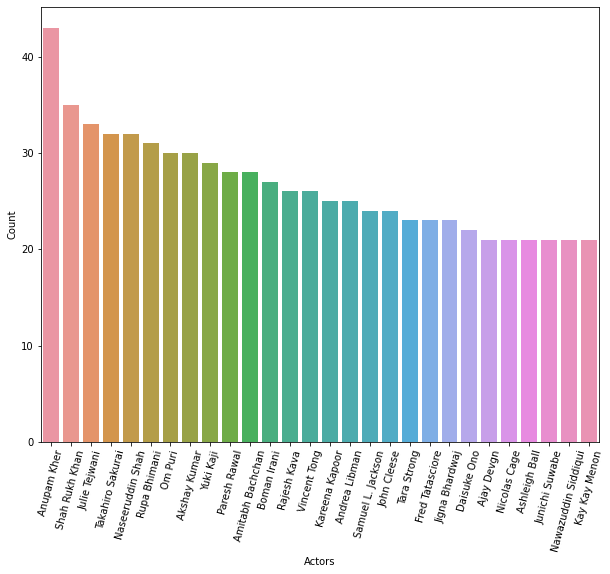

In [67]:
df_Actors_top_20 = df_Actors[df_Actors['Count'] > 20]
df_Actors_top_20 = df_Actors_top_20[df_Actors_top_20['Actors'] != 'Unknown']
plt.figure(figsize=(10,8))
g = sns.barplot(x="Actors", y='Count',data=df_Actors_top_20)
g.tick_params(axis='x', rotation=75)

In [68]:
# Lets understand  type of show for 20 actors

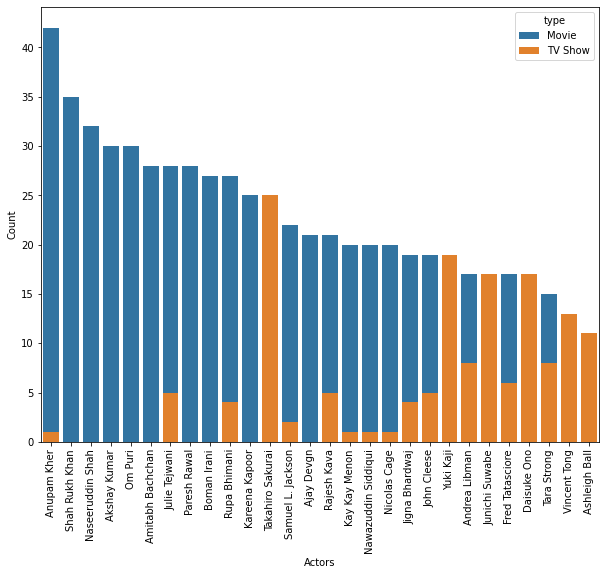

In [69]:
df_Actors = df_fnl.drop_duplicates(['show_id','Actors','type'])

df_Actors = df_Actors.groupby(['Actors','type'])['show_id'].count()

df_Actors = pd.DataFrame(df_Actors.reset_index())

df_Actors.rename(columns = {'show_id' : 'Count'}, inplace = True)
df_Actors = df_Actors.sort_values('Count', ascending= False, ignore_index = True )

df_Actors = df_Actors[df_Actors['Actors'] != 'Unknown']

df_Actors_top_20['Actors'].to_list()

df_Actors_top_20_Genre = df_Actors[df_Actors['Actors'].isin(df_Actors_top_20['Actors'].to_list())]
df_Actors_top_20_Genre = df_Actors_top_20_Genre[df_Actors_top_20_Genre['Actors'] != 'Unknown']
plt.figure(figsize=(10,8))
g = sns.barplot(x="Actors", y='Count',data=df_Actors_top_20_Genre, hue = 'type', dodge = False, )
g.tick_params(axis='x', rotation=90)

#place legend outside top right corner of plot
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

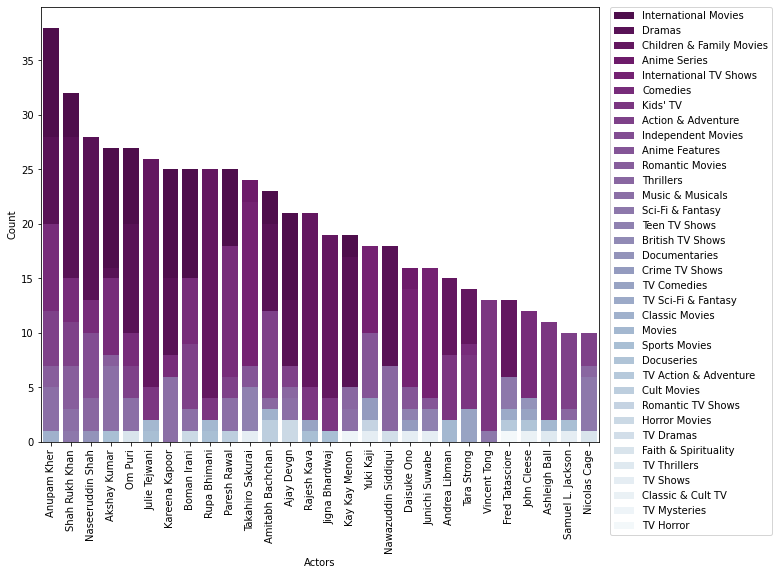

In [70]:
df_Actors = df_fnl.drop_duplicates(['show_id','Actors','Genre'])

df_Actors = df_Actors.groupby(['Actors','Genre'])['show_id'].count()

df_Actors = pd.DataFrame(df_Actors.reset_index())

df_Actors.rename(columns = {'show_id' : 'Count'}, inplace = True)
df_Actors = df_Actors.sort_values('Count', ascending= False, ignore_index = True )

df_Actors = df_Actors[df_Actors['Actors'] != 'Unknown']

df_Actors_top_20['Actors'].to_list()

df_Actors_top_20_Genre = df_Actors[df_Actors['Actors'].isin(df_Actors_top_20['Actors'].to_list())]
df_Actors_top_20_Genre = df_Actors_top_20_Genre[df_Actors_top_20_Genre['Actors'] != 'Unknown']
plt.figure(figsize=(10,8))
g = sns.barplot(x="Actors", y='Count',data=df_Actors_top_20_Genre, hue = 'Genre', dodge = False, palette = 'BuPu_r')
g.tick_params(axis='x', rotation=90)

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Top 20 productive actors analysis**
> Only TV shows concentracted actors Takahiro Sakurai, Yoki kaji, Vincent Tong and Ashleigh ball - 4/20

> Top 10 productive actors are highly concetrated on movies and very less or nothing on TV shows.

> Genre wise, Top 20 actors are main focus is on international movies, Drams, international TV shows and comedies.

# Directors wise data analysis

In [71]:
df_fnl.head(2)

,show_id,Country,Genre,Directors,Actors,type,title,date_added,release_year,rating,duration,description,added_year,added_month,added_day,gap_ad_rls
0,s1,United States,Documentaries,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,South Africa,International TV Shows,Unknown,Ama Qamata,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,0


In [72]:
df_Directors = df_fnl.drop_duplicates(['show_id','Directors'])

df_Directors = df_Directors.groupby(['Directors',])['show_id'].count()

df_Directors = pd.DataFrame(df_Directors.reset_index())

df_Directors.rename(columns = {'show_id' : 'Count'}, inplace = True)
df_Directors = df_Directors.sort_values('Count', ascending= False, ignore_index = True)
df_Directors = df_Directors[df_Directors['Directors'] != 'Unknown']

# df_Actors = df_Actors.merge(df_fnl[['Country','Actors']], on = 'Actors', how = 'left')
# df_Actors = df_Actors.drop_duplicates()
# df_Actors

df_Directors

,Directors,Count
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
...,...,...
4987,Brandon Camp,1
4988,Juan Antin,1
4989,Juan Antonio de la Riva,1
4990,Juan Camilo Pinzon,1


In [73]:
df_Directors_top_20 = df_Directors[df_Directors['Count'] > 6]
df_Directors_top_20.shape

(44, 2)

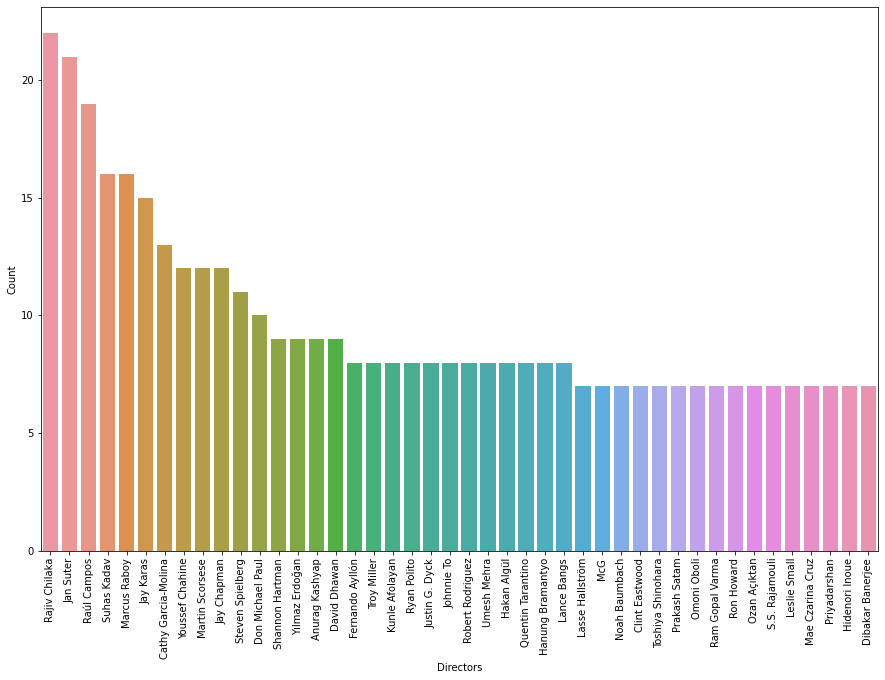

In [74]:
df_Directors_min_5 = df_Directors[df_Directors['Count'] > 6]
df_Directors_min_5 = df_Directors_min_5[df_Directors_min_5['Directors'] != 'Unknown']
plt.figure(figsize=(15,10))
g = sns.barplot(x="Directors", y='Count',data=df_Directors_min_5)
g.tick_params(axis='x', rotation=90)

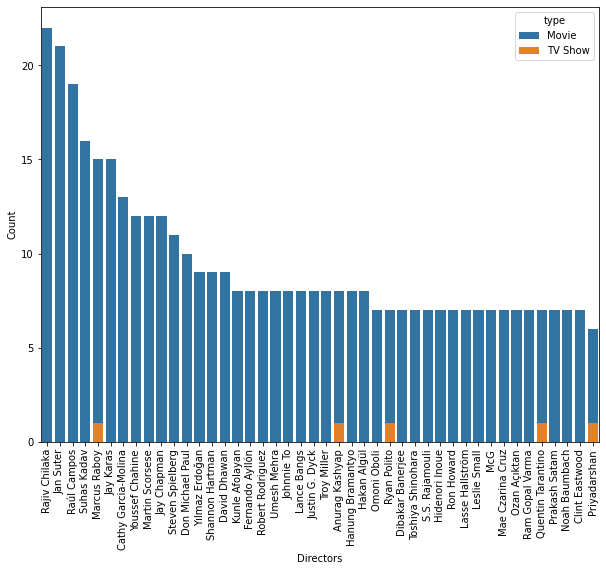

In [75]:
df_Directors = df_fnl.drop_duplicates(['show_id','Directors','type'])

df_Directors = df_Directors.groupby(['Directors','type'])['show_id'].count()

df_Directors = pd.DataFrame(df_Directors.reset_index())

df_Directors.rename(columns = {'show_id' : 'Count'}, inplace = True)
df_Directors = df_Directors.sort_values('Count', ascending= False, ignore_index = True )

df_Directors = df_Directors[df_Directors['Directors'] != 'Unknown']

df_Directors_min_5['Directors'].to_list()

df_Directors_top_5_type = df_Directors[df_Directors['Directors'].isin(df_Directors_min_5['Directors'].to_list())]
df_Directors_top_5_type = df_Directors_top_5_type[df_Directors_top_5_type['Directors'] != 'Unknown']
plt.figure(figsize=(10,8))
g = sns.barplot(x="Directors", y='Count',data=df_Directors_top_5_type, hue = 'type', dodge = False, )
g.tick_params(axis='x', rotation=90)

#place legend outside top right corner of plot
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


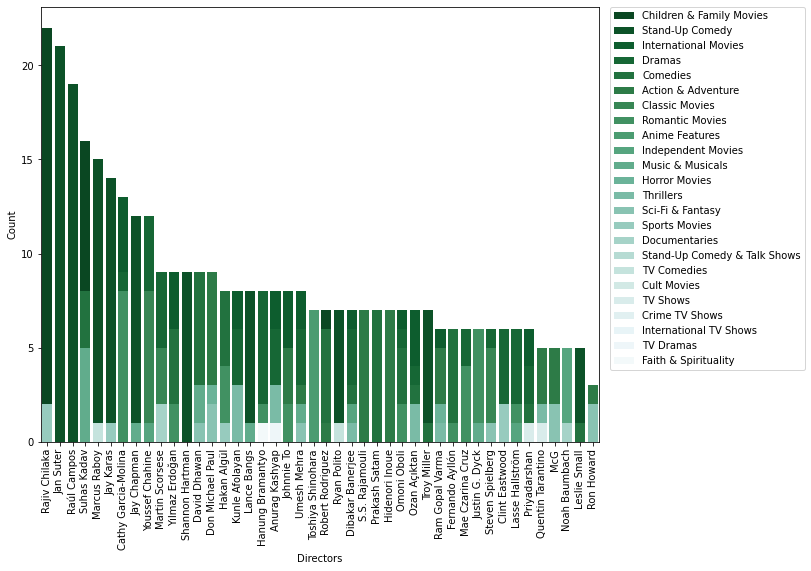

In [76]:
df_Directors = df_fnl.drop_duplicates(['show_id','Directors','Genre'])

df_Directors = df_Directors.groupby(['Directors','Genre'])['show_id'].count()

df_Directors = pd.DataFrame(df_Directors.reset_index())

df_Directors.rename(columns = {'show_id' : 'Count'}, inplace = True)
df_Directors = df_Directors.sort_values('Count', ascending= False, ignore_index = True )

df_Directors = df_Directors[df_Directors['Directors'] != 'Unknown']

df_Directors_min_5['Directors'].to_list()

df_Directors_top_5_type = df_Directors[df_Directors['Directors'].isin(df_Directors_min_5['Directors'].to_list())]
df_Directors_top_5_type = df_Directors_top_5_type[df_Directors_top_5_type['Directors'] != 'Unknown']
plt.figure(figsize=(10,8))
g = sns.barplot(x="Directors", y='Count',data=df_Directors_top_5_type, hue = 'Genre', dodge = False, palette='BuGn_r')
g.tick_params(axis='x', rotation=90)

#sns.palplot(sns.color_palette("BuGn_r", 10))
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 )


# Understand genre and country relationship

In [77]:
df_fnl.head(2)

,show_id,Country,Genre,Directors,Actors,type,title,date_added,release_year,rating,duration,description,added_year,added_month,added_day,gap_ad_rls
0,s1,United States,Documentaries,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,South Africa,International TV Shows,Unknown,Ama Qamata,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,0


In [78]:
df_fnl['Country'].value_counts().index[:25].to_list()

['United States',
 'India',
 'United Kingdom',
 'Unknown',
 'Japan',
 'France',
 'Canada',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China',
 'Turkey',
 'Australia',
 'Nigeria',
 'Hong Kong',
 'Egypt',
 'Indonesia',
 'Taiwan',
 'Belgium',
 'Thailand',
 'Philippines',
 'Brazil',
 'Argentina',
 'Italy']

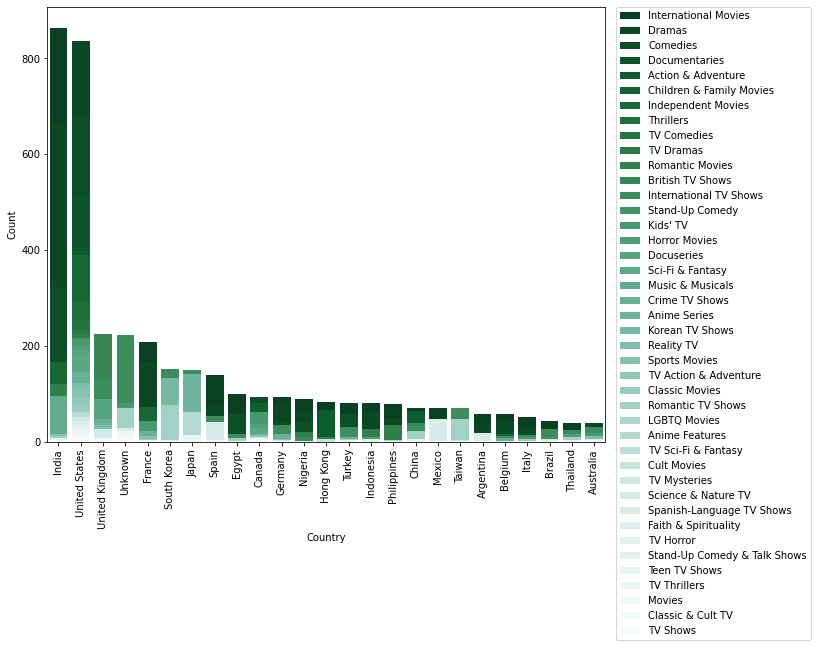

In [79]:
df_gr_cnty = df_fnl.drop_duplicates(['show_id','Genre','Country'])

df_gr_cnty = df_gr_cnty.groupby(['Country','Genre'])['show_id'].count()

df_gr_cnty = pd.DataFrame(df_gr_cnty.reset_index())

df_gr_cnty.rename(columns = {'show_id' : 'Count'}, inplace = True)
df_gr_cnty = df_gr_cnty.sort_values('Count', ascending= False, ignore_index = True )

df_fnl['Country'].value_counts().index[:25].to_list()
df_gr_cnty_top_25 = df_gr_cnty[df_gr_cnty['Country'].isin(df_fnl['Country'].value_counts().index[:25].to_list())]

#df_gr_cnty_top_25 = df_gr_cnty_top_25[df_gr_cnty_top_25['Country'] != 'Unknown']
plt.figure(figsize=(10,8))
g = sns.barplot(x="Country", y='Count',data=df_gr_cnty_top_25, hue = 'Genre', dodge = False, palette='BuGn_r')
g.tick_params(axis='x', rotation=90)

# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#df_gr_cnty_top_25

### Above graph is for top 25 countries by production and their genre
> India with international movie, dramas, comedies.

> US with international movie and TV shows

# Relation between release year and added year gap 
**between contry, between acotrs and directors**

In [80]:
df_fnl.head(2)

,show_id,Country,Genre,Directors,Actors,type,title,date_added,release_year,rating,duration,description,added_year,added_month,added_day,gap_ad_rls
0,s1,United States,Documentaries,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,South Africa,International TV Shows,Unknown,Ama Qamata,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,0


In [81]:
df_actor_gap_mean = df_fnl.drop_duplicates(['Actors','gap_ad_rls'])

df_actor_gap_mean = df_fnl.groupby(['Actors'])['gap_ad_rls'].mean()

df_actor_gap_mean = pd.DataFrame(df_actor_gap_mean.reset_index())

df_actor_gap_mean.rename(columns = {'gap_ad_rls' : 'Mean'}, inplace = True)
df_actor_gap_mean = df_actor_gap_mean.sort_values('Mean', ascending= True, ignore_index = True )

df_actor_gap_mean.drop_duplicates(inplace = True, ignore_index = True)

df_actor_gap_mean

,Actors,Mean
0,Jr.,0.000000
1,Kaustubh Kumar,0.000000
2,Kaustubh Narain,0.000000
3,Kavin Jay,0.000000
4,Kavya Bector,0.000000
...,...,...
36388,Vera-Ellen,66.000000
36389,Lloyd Bridges,70.000000
36390,Walter Huston,71.666667
36391,Dana Andrews,72.000000


In [82]:
df_actor_gap_mean = df_fnl.drop_duplicates(['Genre','gap_ad_rls'])

df_actor_gap_mean = df_fnl.groupby(['Genre'])['gap_ad_rls'].mean()

df_actor_gap_mean = pd.DataFrame(df_actor_gap_mean.reset_index())

df_actor_gap_mean.rename(columns = {'gap_ad_rls' : 'Mean'}, inplace = True)
df_actor_gap_mean = df_actor_gap_mean.sort_values('Mean', ascending= True, ignore_index = True )

df_actor_gap_mean.drop_duplicates(inplace = True, ignore_index = True)

df_actor_gap_mean

,Genre,Mean
0,Stand-Up Comedy & Talk Shows,0.317164
1,TV Mysteries,0.685402
2,TV Thrillers,0.773438
3,TV Horror,0.821467
4,Crime TV Shows,1.117922
5,TV Action & Adventure,1.233099
6,Reality TV,1.296599
7,Science & Nature TV,1.350318
8,Spanish-Language TV Shows,1.732767
9,TV Dramas,1.813053


In [83]:
df_actor_gap_mean = df_fnl.drop_duplicates(['Directors','gap_ad_rls'])

df_actor_gap_mean = df_fnl.groupby(['Directors'])['gap_ad_rls'].mean()

df_actor_gap_mean = pd.DataFrame(df_actor_gap_mean.reset_index())

df_actor_gap_mean.rename(columns = {'gap_ad_rls' : 'Mean'}, inplace = True)
df_actor_gap_mean = df_actor_gap_mean.sort_values('Mean', ascending= True, ignore_index = True )

df_actor_gap_mean.drop_duplicates(inplace = True, ignore_index = True)

df_actor_gap_mean

,Directors,Mean
0,Ryan Koo,0.000000
1,Gary Cohen,0.000000
2,Gary Andrews,0.000000
3,Nag Ashwin,0.000000
4,Garrett Bradley,0.000000
...,...,...
4987,Roy Boulting,73.000000
4988,Anthony Veiller,73.000000
4989,Frank Capra,73.090909
4990,Anatole Litvak,74.000000


# Understanding
> Gap between relase year and added year for Genre, Tv related shows are released very soon and Cult Movies & classic movies have more gap.

> Actor and direcotrs have outlier and only one movie has been released under them in many cases, so nothing can be infered from this.


In [84]:
df_fnl.head(2)

,show_id,Country,Genre,Directors,Actors,type,title,date_added,release_year,rating,duration,description,added_year,added_month,added_day,gap_ad_rls
0,s1,United States,Documentaries,Kirsten Johnson,Unknown,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,1
1,s2,South Africa,International TV Shows,Unknown,Ama Qamata,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,0


In [85]:
df_fnl['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [86]:
df_fnl['rating'].nunique()

14

**FINAL RECOMENDATION TO THE BUSSINESS:**

    > OVERALL TREND IS MORE MOVIES ARE RELAESING COMPARED TO TV SHOWS.
    
    > NETFLIX AVERAGE GAP BETWEEN RELEASE AND ADD YEAR IS LESS FOR TV SHOWS COMPARED MOVIES. 
    
    > CONTINUE TO ADD DIRECT TO NETFLIX TV SHOWS. WHICH ARE EVEN HAVING BETTER RATING COMPARED TO MOVIES.
    
    > GENRES GOOD TO ADD MORE --> Stand-Up Comedy & Talk Shows, INTRENATIONAL MOVIES, DRAMAS AND COMEDIES.
    
    > GENRES NOT IN DEMAND --> FAITH AND SPRITUALITY AND CLASIC CULT TV.
    
    > TOP 5 MARKETS ARE --> 'United States', 'India','United Kingdom','Japan', 'France' 
    
    > CONTINUE TO FOCUS ON GENRE AND COUNTRY MENTIONED ABOVE.